In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [ ]:
def split_seq(seq, N):
    x, y = [],[]
    length =  len(seq)
    for i in range(length):
        if i > length - N - 1 : break
        x.append(seq[i:i+N])
        y.append(seq[i+N])
    return np.array(x), np.array(y) 

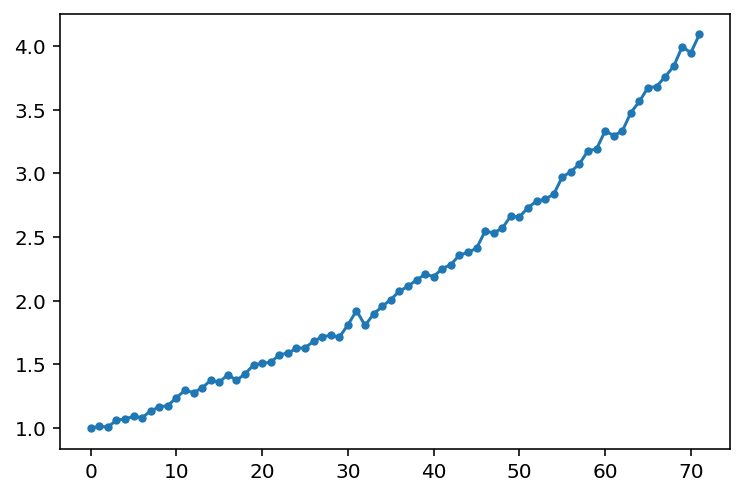

In [133]:
n = 72; i = 1.02
x = np.arange(n)
np.random.seed(9)
y = [i**n for n in range(n)] + np.random.randn(n)*0.03
plt.scatter(x,y, s=10)
plt.plot(x,y)

In [134]:
ratio = 0.8 # 훈련에 사용할 데이터 비율
cut = np.int(len(y)*ratio) # 정수화
train = y[:cut] # fit에 사용, seq --> train,  m 훈련
test = y[cut:] # m.predict에 사용, r2_score, N(윈도우 크기) = 12 ??
len(train), len(test)

(57, 15)

1 0.9487690188905924
2 0.9582450735334123
3 0.9474623270551247
4 0.9519650590344515
5 0.9439990900232441
6 0.9191507171675497
7 0.8628949608353949
8 0.8072348629110363
9 0.8344165830677419
10 0.692445721655286
10 0.9519650590344515


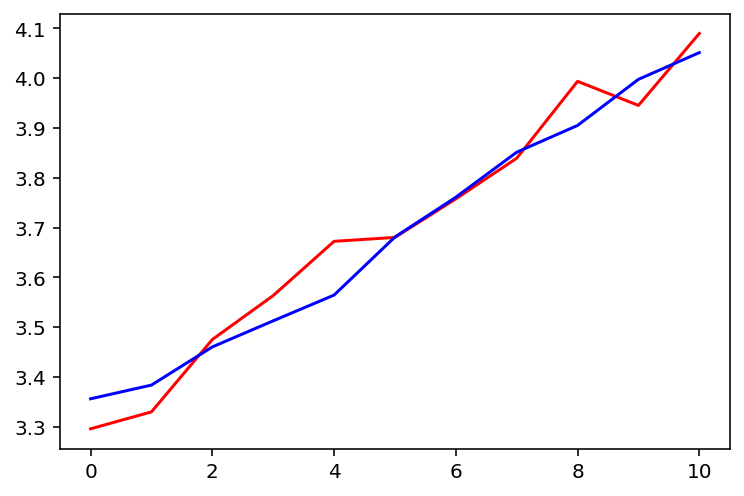

In [136]:
m = LinearRegression()
for i in range(10):
    x_train, y_train = split_seq(train, i+1) # 28 개월
    x_test, y_test = split_seq(test, i+1) # 20 개월
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    print(i+1, r2_score(y_test, y_pred))

N=4    # 최적 윈도우 크기 확보

x_train, y_train = split_seq(train, N) # 28 개월
x_test, y_test = split_seq(test, N) # 20 개월
m.fit(x_train, y_train)
y_pred = m.predict(x_test)
print(i+1, r2_score(y_test, y_pred))
plt.plot(y_test, c='r') ; plt.plot(y_pred, c='b')